38.00825425405674


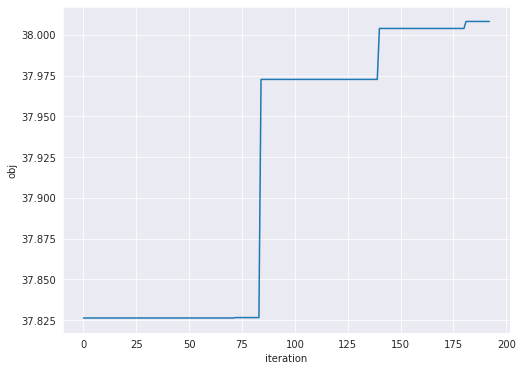

In [36]:
from numpy.random import choice
import  numpy as np
import random

def objective(x):
  return x[0]**3 + x[1]**2 + x[2] +7

def encode(bound,n_bits, pop):
  encode = list()
  larg_value = 2**n_bits
  for i in range(len(bound)):
    start =  i*n_bits
    end = start + n_bits
    tmp =  pop[start:end]
    chars = ''.join([str(s)for s in tmp])
    integers = int(chars,2)
    value = bound[i][0]+ (integers/larg_value*(bound[i][1]-bound[i][0]))
    encode.append(value)
  return encode

def mutation(a,b,c):
  mut = list()
  m = np.array(a) + np.array(b)-np.array(c)
  for t in m:
    if(t>=2):
      mut.append(1)
    else:
      mut.append(0)
  return mut

def crossover(mutated,p):
  cross = list()
  for i in range(len(p)):
    r = np.random.random()
    if r > 0.9:
      cross.append(mutated[i])
    else:
      cross.append(p[i])
  return cross

bound = np.array([(1.0,2.0),(1.0,5.0),(0.0,1.0)])
n_bits = 16
n_pop = 100
pop = [np.random.randint(0,2,n_bits*len(bound)).tolist() for item in range(n_pop)]

encoded = [encode(bound,n_bits,p) for p in pop]
#print(encoded[1])
obj = [objective(en) for en in encoded]
#หาค่ามากสุด
best_obj = np.max(obj)
#print(best_obj)
#หาตำแหน่งค่ามากสุด
best_position = np.argmax(obj)
best_vect = pop[best_position]

res = list()
res.append(best_obj)

for k in range(100):
  for i in range(n_pop):
    p = pop[i]
    candidates = [candidate for candidate in range(n_pop)if candidate != i]
    x =np.random,choice(candidates,3,replace=False)
    a = pop[0]
    b = pop[1]
    c = pop[2]
    mutated = mutation(a,b,c)
    new_pop = crossover(mutated,p)
    new_obj = objective(encode(bound,n_bits,new_pop))
    old_obj = objective(encode(bound,n_bits,p))
    if new_obj > old_obj:
      pop[i] = new_pop
      if(new_obj>best_obj):
        best_obj = new_obj
      res.append(best_obj)
      
print(best_obj)
from matplotlib import pyplot as plt
import seaborn as bnb

plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel('iteration')
plt.ylabel('obj')
bnb.set_style('darkgrid')
plt.plot(res)
plt.show()